<a href="https://colab.research.google.com/github/lblogan14/master_tensorflow_keras/blob/master/ch13_deep_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reinforcement learning is a form of learning in which a software agent observes the
environment and takes actions so as to maximize its rewards from the environment,

![alt text](https://github.com/armando-fandango/Mastering-TensorFlow/blob/master/images/ch-13/13-01.png?raw=true)

## Preparations before Running OpenAI Gym

In [47]:
#installing dependencies
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip3 -q install gym
!pip3 install piglet
!pip3 -q install pyglet
!pip3 -q install pyopengl
!pip3 -q install pyvirtualdisplay
!apt install xvfb -y

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


##Graphical-User-Interface Amination
The following code prompts a recorded video to see the simulated environment

observation space: Box(4,)
action space: Discrete(2)
initial observation: [-0.03448852 -0.01493949 -0.01451675 -0.04860996]
next observation: [-0.03478731  0.18038758 -0.01548894 -0.34583746]
reward: 1.0
done: False
info: {}
test episode: 0 R: 32.0
test episode: 1 R: 19.0
test episode: 2 R: 20.0


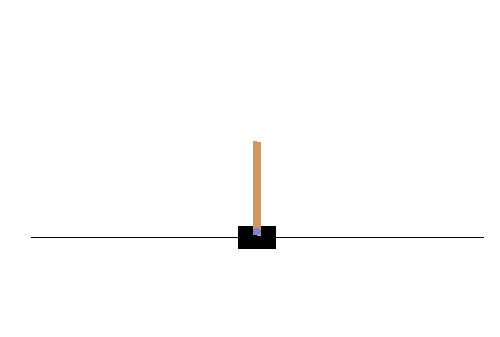

In [48]:
import gym
import matplotlib.pyplot as plt
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

frames = []
for i in range(3):
    obs = env.reset()
    done = False
    R = 0
    t = 0
    while not done and t < 200:
        frames.append(env.render(mode = 'rgb_array'))
        obs, r, done, _ = env.step(env.action_space.sample())
        R += r
        t += 1
    print('test episode:', i, 'R:', R)

env.render()


import matplotlib.animation
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

###Code Prerequisite

In [49]:
from collections import deque 

import numpy as np
np.random.seed(123)
print("NumPy:{}".format(np.__version__))

import tensorflow as tf
tf.set_random_seed(123)
print("TensorFlow:{}".format(tf.__version__))

import keras
print("Keras:{}".format(keras.__version__))

import gym
print('OpenAI Gym:',gym.__version__)

NumPy:1.14.6
TensorFlow:1.12.0
Keras:2.2.4
OpenAI Gym: 0.10.9


#OpenAI Gym 101
To install OpenAI Gtm,

    pip3 install gym
    

Print the number of avaiable environments in OpenAI Gym,

In [4]:
all_env = list(gym.envs.registry.all())
print('Total Environments in Gym version {} : {}'.format(gym.__version__, len(all_env)))

Total Environments in Gym version 0.10.9 : 797


Print the list of all environments,

In [6]:
for e in list(all_env):
  print(e)

EnvSpec(Copy-v0)
EnvSpec(RepeatCopy-v0)
EnvSpec(ReversedAddition-v0)
EnvSpec(ReversedAddition3-v0)
EnvSpec(DuplicatedInput-v0)
EnvSpec(Reverse-v0)
EnvSpec(CartPole-v0)
EnvSpec(CartPole-v1)
EnvSpec(MountainCar-v0)
EnvSpec(MountainCarContinuous-v0)
EnvSpec(Pendulum-v0)
EnvSpec(Acrobot-v1)
EnvSpec(LunarLander-v2)
EnvSpec(LunarLanderContinuous-v2)
EnvSpec(BipedalWalker-v2)
EnvSpec(BipedalWalkerHardcore-v2)
EnvSpec(CarRacing-v0)
EnvSpec(Blackjack-v0)
EnvSpec(KellyCoinflip-v0)
EnvSpec(KellyCoinflipGeneralized-v0)
EnvSpec(FrozenLake-v0)
EnvSpec(FrozenLake8x8-v0)
EnvSpec(CliffWalking-v0)
EnvSpec(NChain-v0)
EnvSpec(Roulette-v0)
EnvSpec(Taxi-v2)
EnvSpec(GuessingGame-v0)
EnvSpec(HotterColder-v0)
EnvSpec(Reacher-v2)
EnvSpec(Pusher-v2)
EnvSpec(Thrower-v2)
EnvSpec(Striker-v2)
EnvSpec(InvertedPendulum-v2)
EnvSpec(InvertedDoublePendulum-v2)
EnvSpec(HalfCheetah-v2)
EnvSpec(Hopper-v2)
EnvSpec(Swimmer-v2)
EnvSpec(Walker2d-v2)
EnvSpec(Ant-v2)
EnvSpec(Humanoid-v2)
EnvSpec(HumanoidStandup-v2)
EnvSpec(FetchS

Each environment, `env` object, has a standardized interface,
* An `env` object can be created with the `env.make({gmae-id-string})` function by passing the id string
* Each `env` object contains the following main functions:
  * The `step()` function takes an action object as an argument and returns four objects:
    * *observation*: an object implemented by the environment, representing the observation of the environment
    * *reward*: an signed float value indicating the gain (or loss) from the previous action
    * *done*: a boolean value representing if the scenario is finished
    * *info*: a python dictionary object representing the diagnostic information
  * The `render()` function creates a visual representation of the environment
  * The `reset()` function resets the environment to the original state
* Each `env` object comes with well-defined actions and observations, represented by `action_space` and `observation_space`

###CartPole
One of the most popular games in the gym to learn reinforcement learning is CartPole. In
this game, a pole attached to a cart has to be balanced so that it doesn't fall. The game ends
if either the pole tilts by more than 15 degrees or the cart moves by more than 2.4 units from
the center.

The game has only four observations and two actions. The actions are to move a cart by
applying a force of +1 or -1. The observations are the position of the cart, the velocity of the
cart, the angle of the pole, and the rotation rate of the pole.



Load this game environment, CartPole-v0, and play it with stochastic control,

In [0]:
env = gym.make('CartPole-v0')

In [0]:
n_episodes = 1

The number of episodes is the number of game plays. We shall set it to one, for
now, indicating that we just want to play the game once. Since every episode is
stochastic, in actual production runs you will run over several episodes and
calculate the average values of the rewards.

In [0]:
env_vis = []

`env_vis` initialzie an aray to store the visualization of the environment at every timestep.

Run two nested loops—an external loop for the number of episodes and an
internal loop for the number of timesteps you would like to simulate for. You can
either keep running the internal loop until the scenario is done or set the number
of steps to a higher value.
* At the beginning of every episode, reset the environment using `env.reset()`.
* At the beginning of every timestep, capture the visualization using `env.render()`.

After running through all episode, plot the animation to show the result

In [20]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

env_vis = []
for i_episode in range(n_episodes): #episodes
    observation = env.reset()
    done = False
    Rewards = 0 # total reward
    t = 0
    while not done and t < 100: #timesteps
        env_vis.append(env.render(mode = 'rgb_array'))
        print('Episode {}, Observation {}: '.format(i_episode, t), observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        Rewards += reward
        t += 1
    print('Episode:', i_episode, 'Total Reward:', Rewards)

env.render()

Episode 0, Observation 0:  [-0.04794095  0.01216605 -0.02934801  0.00582385]
Episode 0, Observation 1:  [-0.04769763 -0.18252298 -0.02923154  0.28910457]
Episode 0, Observation 2:  [-0.05134809  0.01300335 -0.02344945 -0.01265248]
Episode 0, Observation 3:  [-0.05108802  0.20845361 -0.02370249 -0.31264078]
Episode 0, Observation 4:  [-0.04691895  0.0136772  -0.02995531 -0.02752612]
Episode 0, Observation 5:  [-0.04664541  0.20921564 -0.03050583 -0.32950774]
Episode 0, Observation 6:  [-0.04246109  0.01454094 -0.03709599 -0.04659887]
Episode 0, Observation 7:  [-0.04217027 -0.18002998 -0.03802796  0.23415301]
Episode 0, Observation 8:  [-0.04577087  0.01561409 -0.0333449  -0.07027846]
Episode 0, Observation 9:  [-0.04545859 -0.17901433 -0.03475047  0.2117003 ]
Episode 0, Observation 10:  [-0.04903888 -0.37362264 -0.03051647  0.49322194]
Episode 0, Observation 11:  [-0.05651133 -0.56830119 -0.02065203  0.77613336]
Episode 0, Observation 12:  [-0.06787736 -0.37290138 -0.00512936  0.477024

True

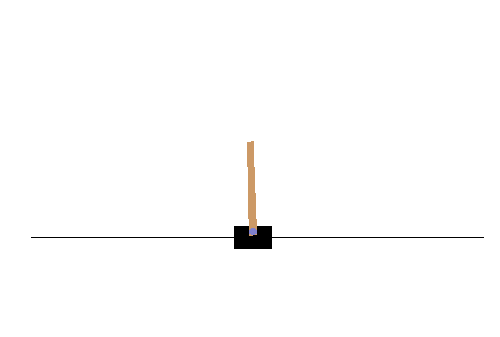

In [21]:
# Plot animation
import matplotlib.animation
from IPython.display import HTML

plt.figure(figsize=(env_vis[0].shape[1] / 72.0, env_vis[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(env_vis[0])
plt.axis('off')
animate = lambda i: patch.set_data(env_vis[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(env_vis), interval = 50)
HTML(ani.to_jshtml())

In [0]:
# close the environment to free up space
env.close()

For this example, it took 23 timesteps for the pole to become unbalanced. At every run, we get a different
time-step value because we picked the action scholastically by using `env.action_space.sample()`.

#Applying simple policies to CartPole game
The third observation refers to the angle. If the
angle is greater than zero, that means the pole is tilting right, thus we move the cart to the
right (1). Otherwise, we move the cart to the left (0).

Thus we can use this information to define two policy function,

In [0]:
def policy_logic(env, obs):
  return 1 if obs[2] > 0 else 0

def policy_random(env, obs):
  return env.action_space.sample()

Next, we define an experiment function that will run for a specific number of
episodes; each episode runs until the game is lost, namely when `done` is `True`. In addition, we use `rewards_max` to indicate when to break out of the while loop.

In [0]:
def experiment(policy, n_episodes, rewards_max):
  rewards = np.empty(shape=n_episodes)
  env = gym.make('CartPole-v0')
  
  for i in range(n_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0
    while not done:
      action = policy(env, obs)
      obs, reward, done, info = env.step(action)
      episode_reward += reward
      if episode_reward > rewards_max:
        break
    
    rewards[i] = episode_reward
  
  print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
        .format(policy.__name__,
                np.min(rewards),
                np.max(rewards),
                np.mean(rewards)
               )
       )
 
  env.close()

Run the experiment 100 times, or until the rewards are less than or equal to rewards_max, that is set to 10,000:

In [37]:
n_episodes = 100
rewards_max = 10000

experiment(policy_random, n_episodes, rewards_max)
experiment(policy_logic, n_episodes, rewards_max)

Policy:policy_random, Min reward:9.0, Max reward:52.0, Average reward:21.91
Policy:policy_logic, Min reward:24.0, Max reward:67.0, Average reward:40.08


The result based on logic action does better than random action

##Simple Policy with Parameters
Now let us modify the process of selecting the action further—to be based on **parameters**.


The parameters will be multiplied by the observations and the action will be chosen based
on whether the multiplication result is zero or one.

In [0]:
def policy_logic(theta, obs):
  # ignore theta
  return 1 if obs[2] > 0 else 0

def policy_random(theta, obs):
  return 0 if np.matmul(theta, obs) < 0 else 1

def episode(env, policy, rewards_max):
  obs = env.reset()
  done = False
  episode_reward = 0
  if policy.__name__ in ['policy_random']:
    theta = np.random.rand(4) * 2 -1
  else:
    theta = None
    
  while not done:
    action = policy(theta, obs)
    obs, reward, done, info = env.step(action)
    episode_reward += reward
    if episode_reward > rewards_max:
      break
      
  return episode_reward

In [0]:
def experiment(policy, n_episodes, rewards_max):
  rewards = np.empty(shape=(n_episodes))
  env = gym.make('CartPole-v0')
  
  for i in range(n_episodes):
    rewards[i] = episode(env, policy, rewards_max)
    
  print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
        .format(policy.__name__,
                np.min(rewards),
                np.max(rewards),
                np.mean(rewards)
               )
       )
  env.close()

In [44]:
n_episodes = 100
rewards_max = 10000

experiment(policy_random, n_episodes, rewards_max)
experiment(policy_logic, n_episodes, rewards_max)

Policy:policy_random, Min reward:8.0, Max reward:200.0, Average reward:38.08
Policy:policy_logic, Min reward:25.0, Max reward:64.0, Average reward:42.39


With the random search, we have improved our results to get the max rewards of 200. On
average, the rewards for random search are lower because random search tries various bad
parameters that bring the overall results down.

##Simple Policy with Training
However, we can select the best parameters
from all the runs and then, in production, use the best parameters. Modify the code to train the parameters first.

In [0]:
# train with random search

def policy_logic(theta, obs):
  # ignore theta
  return 1 if obs[2]>0 else 0

def policy_random(theta, obs):
  return 0 if np.matmul(theta, obs)<0 else 1

def episode(env, policy, rewards_max, theta):
  obs = env.reset()
  done = False
  episode_reward = 0
  
  while not done:
    action = policy(theta, obs)
    obs, reward, done, info = env.step(action)
    episode_reward += reward
    if episode_reward > rewards_max:
      break
  return episode_reward

def train(policy, n_episodes, rewards_max):
  env = gym.make('CartPole-v0')
  np.random.seed(0)
  
  theta_best = np.empty(shape=[4])
  reward_best = 0
  
  for i in range(n_episodes):
    if policy.__name__ in ['policy_random']:
      theta = np.random.rand(4) *2 -1
    else:
      theta = None
      
    episode_reward = episode(env, policy, rewards_max, theta)
    if episode_reward > reward_best:
      reward_best = episode_reward
      theta_best = theta.copy()
  env.close()
  
  return reward_best, theta_best

def experiment(policy, n_episodes, rewards_max, theta=None):
  rewards = np.empty(shape=[n_episodes])
  env = gym.make('CartPole-v0')
  
  for i in range(n_episodes):
    rewards[i] = episode(env, policy, rewards_max, theta)
  print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
        .format(policy.__name__,
                np.min(rewards),
                np.max(rewards),
                np.mean(rewards)
               )
       )
  env.close()

In [8]:
n_episodes = 100
rewards_max = 10000

reward,theta = train(policy_random, n_episodes, rewards_max)
print('Trained theta: {}, rewards: {}'.format(theta, reward))
experiment(policy_random, n_episodes, rewards_max, theta)
experiment(policy_logic, n_episodes, rewards_max)

Trained theta: [-0.1526904   0.29178823 -0.12482558  0.783546  ], rewards: 200.0
Policy:policy_random, Min reward:200.0, Max reward:200.0, Average reward:200.0
Policy:policy_logic, Min reward:26.0, Max reward:67.0, Average reward:44.41


Another way to optimize the training is to continue training until it reaches certain maximum reward

In [9]:
# train with random search until we reach rewards > 200
def policy_logic(theta,obs):
    # just ignore theta
    return 1 if obs[2] > 0 else 0

def policy_random(theta,obs):
    return 0 if np.matmul(theta,obs) < 0 else 1

def episode(env,policy, rewards_max,theta):
    obs = env.reset()
    done = False
    episode_reward = 0

    while not done:
        action = policy(theta,obs)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        if episode_reward > rewards_max:
            break
    return episode_reward

def train(policy, n_episodes, rewards_max):

    env = gym.make('CartPole-v0')
    np.random.seed(0)
    
    theta_best = np.empty(shape=[4])
    reward_best = 0

    # n_episodes acts as a max in this case
    for i in range(n_episodes):
        if policy.__name__ in ['policy_random']:
            theta = np.random.rand(4) * 2 - 1
        else:
            theta = None
        reward_episode=episode(env,policy,rewards_max, theta)
        if reward_episode > reward_best:
            reward_best = reward_episode
            theta_best = theta.copy()
        if reward_best >= rewards_max:
            break
    env.close()
    return reward_best,theta_best
    
def experiment(policy, n_episodes, rewards_max, theta=None):
    rewards=np.empty(shape=[n_episodes])
    env = gym.make('CartPole-v0')
    
    for i in range(n_episodes):
        rewards[i]=episode(env,policy,rewards_max,theta)
        #print("Episode finished at t{}".format(reward))
    print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
          .format(policy.__name__,
                  np.min(rewards),
                  np.max(rewards),
                  np.mean(rewards)))
    env.close()

n_episodes = 10000 # acts as max episodes to use in training
rewards_max = 200
reward,theta = train(policy_random, n_episodes, rewards_max)
print('trained theta: {}, rewards: {}'.format(theta,reward))

n_episodes = 100
rewards_max = 10000
experiment(policy_random, n_episodes, rewards_max, theta)
experiment(policy_logic, n_episodes, rewards_max)

trained theta: [-0.1526904   0.29178823 -0.12482558  0.783546  ], rewards: 200.0
Policy:policy_random, Min reward:200.0, Max reward:200.0, Average reward:200.0
Policy:policy_logic, Min reward:24.0, Max reward:67.0, Average reward:42.13


#Reinforcement learning 101
Reinforcement learning is described by an agent getting inputs of the *observation* and *reward*
from the previous time-step and producing output as an *action* with the goal of maximizing
cumulative rewards.

The agent has a policy, value function, and model:
* The **policy** is the algorithm used by the agent to pick the next action. Just like the parameter set, theta, defined in the previous section: the next action is based on the multiplication between the observation and the parameters. The policy is represented by $\pi(s):S\rightarrow A$ \\
$S$ is set of states and $A$ is set of actions. \\
The policy can be deterministic or stochastic:
  * Deterministic policy returns the same action for the same state in each run: $\pi(s)=a$
  * Stochastic policy returns the different probabilities for the same action for the same state in each run: $\pi(a|s) = P(A=a|S=s)$
* The **value function** predicts the amount of long-term reward based on the
selected action in the current state. Thus, the value function is specific to the
policy used by the agent. The reward indicates the immediate gain from the
action while the value function indicates the cumulative or long-term future gain
from the action. The reward is returned by the environment and the value
function is estimated by the agent at every time-step.
* The **model** is representation of the environment kept internally by the agent. The model could be an imperfect representation of the environment. The agent uses the model to estimate the reward and the next state from the selected action.

##Q function (learning to optimize when the model is not available)
If the model is not available then the agent learns the model and optimal policy by trial and
error. When the model is not available, the agent uses a Q function,
$$Q:S\times A \rightarrow \mathbb{R}$$
The Q function maps the pairs of states and actions to a real number that denotes the expected total reward if the agent at state $s$ seelcts an action $a$.

##Exploration and Exploitation in the RL algorithms
In the absence of a model, at every step the agent either explores or exploits. 
**Exploration** means that the agent selects an unknown action to find out the reward and the model.

**Exploitation** means that the agent selects the best-known action to get the maximum reward.

If the agent always decides to exploit then it might get stuck in a local optimal
value. Hence, sometimes the agent takes a detour from learned policy to explore unknown
actions. Similarly, if an agent always decides to explore then it may fail to find an optimal
policy. Thus, it is important to have a balance of exploration and exploitation.

For example, we can implement this balance by setting a probability *p* to select a random action and probability *1-p* to select the optimal action

##V function (learning to optimize when the model is available)
If the model is known beforehand then the agent can perform a **policy search** to find the
optimal policy that maximizes the value function. When the model is available, the agent
uses a value function that can be defined naively as a sum of the rewards of the future
states:
$$V^{\pi}(s)=\sum\limits_{i}R_i \quad \forall s \in S $$
Thus, the value at timestep t for selecting actions using the policy p would be:
$$V^{\pi}_t=R_t+R_{t+1}+...+R_{t+n}$$
$V$ is the value and $R$ is the reward, and the value function is estimated only up to n timesteps in the future.

When the agent estimates the reward with this approach, it treats that reward as a result of
all actions equally. In the pole cart example, if the poll falls at step 50, it will treat all the
steps up to the 50th step as being equally responsible for the fall. Hence, instead of adding
the future rewards, the weighted sum of future rewards is estimated. Usually, the weights
are a discount rate raised to the power of the time-step. If the discount rate is zero then the
value function becomes the naive function discussed above, and if the value of the discount
rate is close to one, such as 0.9 or 0.92, then the future rewards have less effect when
compared to the current rewards.

Thus, the value at timestep $t$ for action $a$,
$$V^{\pi}_t=R_t+r\times R_{t+1}= R_t+rR_{t+1}+r^2R_{t+2}+...+r^nR_{t+n}$$
where $V$ is the value, $R$ is the rewards, and $r$ is the discount rate.

###Relationship between the V function and the Q function:
$V^*(s)$ is the optimal value function at state s that gives the maximum reward, and $Q^*(s,a)$ is the optimal Q function at state s that gives the maximum expected reward by selecting action a. Thus, $V^*(s)$ is the maximum of all optimal Q functions $Q^*(s,a)$ over all possible actions:
$$V^*(s)=\max Q^*(s,a) \quad \forall s \in S$$

#Reinforcement learning techniques
Reinforcement learning techniques can be categorized on the basis of the availability of the model as follows:
* **Model is available**: If the model is available then the agent can plan offline by
iterating over policies or the value function to find the optimal policy that gives
the maximum reward.
  * **Value-iteration learning**: In the value-iteration learning approach,
the agent starts by initializing the $V(s)$ to a random value and then
repeatedly updates the $V(s)$ until a maximum reward is found.
  * **Policy-iterative learning**: In the policy-iteration learning approach,
the agent starts by initializing a random policy $p$, and then
repeatedly updates the policy until a maximum reward is found.
* **Model is not available**: If the model is not available, then an agent can only learn
by observing the results of its actions. Thus, from the history of observations,
actions, and rewards, an agent either tries to estimate the model or tries to
directly derive the optimal policy:
  * **Model-based learning**: the agent first
estimates the model from the history, and then uses a policy or
value-based approach to find the optimal policy.
  * **Model-free learning**: the agent does not
estimate the model, but rather estimates the optimal policy directly
from the history. Q-Learning is an example of model-free learning.

The algorithm for the value-iteration learning,

    initialize V(s) to random values for all states
    Repeat
        for s in states
            for a in action
                compute Q[s,a]
            V(s) = max(Q[s]) # max Q for all actions for that state
    Until optimal value of V(s) is found for all states


The algorithm for the policy-iteration learning,

    initialize a policy P_new to random sequence of actions for all states
    Repeat
        P = P_new
        for s in states
            compute V(s) with P[s]
            P_new[s] = policy of optimal V(s)
    Until P == P_new

#Naive Neural Network policy for Reinforcement Learning

In [0]:
# train with neural network

def policy_random(theta, obs):
  return 0 if np.matmul(theta, obs) < 0 else 1

# neural network based policy
def policy_naive_nn(nn, obs):
  return np.argmax(nn.predict(np.array([obs])))

In [0]:
# returns obs -> actions -> rewards arrays
# specify t_max to run for t_max steps
# specify r_max to run until r_max is reached
# specify both t_max and r_max to run for t_max but break if r_max is reached
def episode(env, policy, theta, r_max=0, t_max=0, return_hist_reward=0):
  if return_hist_reward>0:
    o_list = []
    a_list = []
    r_list = []
    
  episode_reward = 0
  
  obs = env.reset()
  done = False
  t = 0
  while not done:
    action = policy(theta, obs)
    if return_hist_reward>0:
      o_list.append(obs)
      a_list.append(action)
    obs, reward, done, info = env.step(action)
    if return_hist_reward>0:
      r_list.append(reward)
    episode_reward += reward
    if r_max>0 and episode_reward>r_max:
      break
    t += 1
    if t_max>0 and t==t_max:
      break
      
  if return_hist_reward >= episode_reward:
    return_val = [np.array(o_list), np.array(a_list), np.array(r_list)]
  else:
    return_val = episode_reward
  return return_val

In [0]:
# experiment collect observations and rewards for each episode
def experiment(env, policy, n_episodes, theta=None, r_max=0, t_max=0, return_hist_reward=0):
  if return_hist_reward>0:
    obs_list = []
    action_list = []
  else:
    rewards = np.empty(shape=[n_episodes])
  for i in range(n_episodes):
    val = episode(env, policy, theta, r_max, t_max, return_hist_reward)
    if isinstance(val, list):
      obs_list.append(val[0])
      action_list.append(val[1])
      if not return_hist_reward:
        rewards[i] = np.sum(val[2])
    else:
      if not return_hist_reward:
        rewards[i] = val
  
  if return_hist_reward>0:
    return_val = [np.concatenate(obs_list, axis=0), np.concatenate(action_list, axis=0)]
  else:
    return_val = []
    print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
          .format(policy.__name__,
                  np.min(rewards),
                  np.max(rewards),
                  np.mean(rewards)))
  return return_val

Define `nn` as a simple one layer MLP taking the observations having four dimensions as input, and produces the probabilities of the two actions:

In [24]:
# build the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


This model needs to be trained. Run the simulation for 100 episodes and collect
the training data only for those episodes where the score is more than 100. If the
score is less then 100, then those states and actions are not worth recording since
they are not examples of good play:

In [33]:
# create training data
env = gym.make('CartPole-v0')
n_obs = 4
n_actions = 2
theta = np.random.rand(4) *2 - 1
n_episodes = 100
r_max = 0
t_max = 0

x_train, y_train = experiment(env, policy_random, n_episodes, 
                              theta, r_max, t_max, return_hist_reward=100)
y_train = np.eye(n_actions)[y_train]
print(x_train.shape, y_train.shape)

(4409, 4) (4409, 2)


Once we got enough samples for training, we can start to train the model

In [34]:
# train the model
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
4409/4409 [==============================] - 0s 98us/step - loss: 1.3585
Epoch 2/50
4409/4409 [==============================] - 0s 93us/step - loss: 0.5058
Epoch 3/50
4409/4409 [==============================] - 0s 113us/step - loss: 0.3382
Epoch 4/50
4409/4409 [==============================] - 0s 109us/step - loss: 0.2542
Epoch 5/50
4409/4409 [==============================] - 0s 95us/step - loss: 0.2009
Epoch 6/50
4409/4409 [==============================] - 0s 95us/step - loss: 0.1647
Epoch 7/50
4409/4409 [==============================] - 0s 97us/step - loss: 0.1403
Epoch 8/50
4409/4409 [==============================] - 0s 91us/step - loss: 0.1231
Epoch 9/50
4409/4409 [==============================] - 0s 96us/step - loss: 0.1103
Epoch 10/50
4409/4409 [==============================] - 0s 95us/step - loss: 0.1004
Epoch 11/50
4409/4409 [==============================] - 0s 95us/step - loss: 0.0928
Epoch 12/50
4409/4409 [==============================] - 0s 96us/step - 

The trained model can be used to play the game. However, the model will not
learn from the further plays of the game until we incorporate a loop updating the
training data:

In [35]:
n_episodes = 200
r_max = 0
t_max = 0

_ = experiment(env, policy_naive_nn, n_episodes,
               theta=model, r_max=r_max, t_max=t_max, return_hist_reward=0)

_ = experiment(env, policy_random, n_episodes,
               theta, r_max, t_max, return_hist_reward=0)

Policy:policy_naive_nn, Min reward:33.0, Max reward:200.0, Average reward:80.395
Policy:policy_random, Min reward:34.0, Max reward:200.0, Average reward:78.75


#Implementing Q-Learning
Q-Learning is a model-free method of finding the optimal policy that can maximize the
reward of an agent. During initial gameplay, the agent learns a Q value for each pair of
(state, action), also known as the *exploration strategy*. Once the Q values are learned, then the optimal policy will be to select an action with the largest Q-value in every state, also known as the *exploitation strategy*. The learning
algorithm may end in locally optimal solutions, hence we keep using the exploration policy
by setting an `exploration_rate` parameter.

The Q-learning algorithm,

    initialize Q(shape=[#s, #a]) to random values or zeros
    Repeat (for each episode)
        observe current state s
        Repeat
            seelct an action a (apply explore or exploit strategy)
            observe state s_next as a result of action a
            update the Q-Table using bellman's equation
            set current state s = s_next
        Until the episode ends or a max reward / max steps condition is reached
    Until a number of episodes or a condition is reached (such as max consecutive wins)
    
The Q-function $Q(s, a)$ is used for selecting the action instead of the rewards, thus this function represents the reward or discounted rewards. The values for the Q-function are updated using the values of the Q-function in the future state. The *bellman equation* is used to update this value,
$$Q(s_t, a_t)=r_t+\gamma\max_a Q(s_{s+1}, a)$$
which means that at timestep $t$, in state $s$, for action $a$, the maximum future reward $Q$ is equal to the reward from the current state plus the max future reward from the next state.

$Q(s,a)$ can be implemented as a Q-Table or as a neural network known as a Q-Network. In
both cases, the task of the Q-Table or the Q-Network is to provide the best possible action
based on the Q value of the given input. The Q-Table-based approach generally becomes
intractable as the Q-Table becomes large, thus making neural networks the best candidate
for approximating the Q-function through Q-Network.

##Initializing and discretizing for Q-Learning
The observations returned by the Cart-Pole environment involves the state of the
environment. The state of Cart-Pole is represented by continuous values that we need to
discretize.

If we discretize these values into small state-space, then the agent gets trained faster, but
with the caveat of risking the convergence to the optimal policy.

The following helper function is used to discretize the state-space of the Cart-Pole environment,

In [0]:
# discretize the value to a state space
def discretize(val, bounds, n_states):
  discrete_val = 0
  if val <= bounds[0]:
    discrete_val = 0
  elif val >= bounds[1]:
    discrete_val = n_states-1
  else:
    discrete_val = int(round((n_states-1)*((val-bounds[0])/(bounds[1]-bounds[0]))))
  return discrete_val

def discretize_state(vals, s_bounds, n_s):
  discrete_vals = []
  for i in range(len(n_s)):
    discrete_vals.append(discretize(vals[i], s_bounds[i], n_s[i]))
  return np.array(discrete_vals, dtype=np.int)

The space is discretized into 10 units for each of the observation dimensions. After the discretization, the upper and lower bounds of the observations are found and the bounds of velocity and angular velocity are changed to be between -1 and +1, instead of -Inf and +Inf:

In [0]:
env = gym.make('CartPole-v0')
n_a = env.action_space.n

# number of discrete states for each observation dimension
n_s = np.array([10, 10, 10, 10]) # position, velocity, angle, angular velocity
s_bounds = np.array(list(zip(env.observation_space.low,
                             env.observation_space.high)
                        )
                   )
# velocity and angular velocity bounds are too high so we bound between -1, +1
s_bounds[1] = (-1.0, 1.0)
s_bounds[3] = (-1.0, 1.0)

##Q-Learning with Q-Table
Since the discretized space is of the dimensions `[10,10,10,10]`, the Q-Table is of `[10,10,10,10,2]` dimensions:

In [0]:
# create a Q-Table of shape (10,10,10,10,2) representing S x A -> R
q_table = np.zeros(shape= np.append(n_s, n_a))

Define a Q-Table policy that exploits or explores based on the `exploration_rate`:

In [0]:
def policy_q_table(state, env):
  # Exploration strategy -> Select a random action
  if np.random.random() < explore_rate:
    action = env.action_space.sample()
  # Exploitation strategy -> Select the action with the highest q
  else:
    action = np.argmax(q_table[tuple(state)])
  return action

Define the `episode()` function running a single episode,

In [0]:
def episode(env, policy, r_max=0, t_max=0):
  
  # observe initial state
  obs = env.reset()
  state_prev = discretize_state(obs, s_bounds, n_s)
  
  # initialize the variables
  episode_reward = 0
  done = False
  t = 0
  while not done:
    
    # select an action, and observe the next state
    action = policy(state_prev, env)
    obs, reward, done, info = env.step(action)
    state_new = discretize_state(obs, s_bounds, n_s)
    
    # update the Q-table
    best_q = np.amax(q_table[tuple(state_new)])
    bellman_q = reward + discount_rate * best_q
    indices = tuple(np.append(state_prev, action))
    q_table[indices] += learning_rate*(bellman_q - q_table[indices])
    
    # set next state as current state
    state_prev = state_new
    
    episode_reward += reward
    if r_max >0 and episode_reward > r_max:
      break
    t += 1
    if t_max >0 and t == t_max:
      break
  return episode_reward

The `experiment()` function calls the episode function and accumulates the rewards for
reporting.

In [0]:
# collect observations and rewards for each episode
def experiment(env, policy, n_episodes,r_max=0, t_max=0):
    
  rewards=np.empty(shape=[n_episodes])
  for i in range(n_episodes):
    val = episode(env, policy, r_max, t_max)
    rewards[i]=val
            
  print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
        .format(policy.__name__,
                np.min(rewards),
                np.max(rewards),
                np.mean(rewards)))

Define the hyperparameters and run,

In [56]:
learning_rate = 0.8
discount_rate = 0.9
explore_rate = 0.2
n_episodes = 1000

experiment(env, policy_q_table, n_episodes)

Policy:policy_q_table, Min reward:8.0, Max reward:178.0, Average reward:22.123


The implementation of the algorithm is very simple to explain. However, you can modify
the code to set the explore rate high initially and then decay as the time-steps pass.
Similarly, you can also implement the decay logic for the learning and discount rates.

##Q-Learning with Q-Network or Deep Q-Network (DQN)
In the DQN, we replace the Q-Table with a neural network (Q-Network) that will learn to
respond with the optimal action as we train it continuously with the explored states and
their Q-Values.

Thus, we need a place to store the game memory for training the network

In [0]:
tf.reset_default_graph()
keras.backend.clear_session()

In [0]:
def policy_q_nn(obs, env):
  # Exploration strategy - Select a random action
  if np.random.random() < explore_rate:
    action = env.action_space.sample()
  # Exploitation strategy - Select the action with the highest q
  else:
    action = np.argmax(q_nn.predict(np.array([obs])))
  return action

Implement the game memory using a deque of size 1000,

In [0]:
memory = deque(maxlen=1000)

Build a simple hidden layer neural network model,

In [92]:
# build the Q-Network
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()
q_nn = model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


The `episode()` function that executes one episode of the game, incorporates the following changes for the Q-Network-based algorithm:
1. After generating the next state, add the states, action, and rewards to the game memory.
2. Generate and update the `q_values` with the maximum future rewards using the bellman function.
3. Train the `q_nn` with the states and the `q_values` we received from memory

In [0]:
def episode(env, policy, r_max=0, t_max=0):
  # observe initial state
  obs = env.reset()
  state_prev = discretize_state(obs, s_bounds, n_s)
  
  # initialize the variables
  episode_reward = 0
  done = False
  t = 0
  
  while not done:
    action = policy(state_prev, env)
    obs, reward, done, info = env.step(action)
    state_next = discretize_state(obs, s_bounds, n_s)
    
    # add the state_prev, action, reward, state_new, done to memory
    memory.append([state_prev, action, reward, state_next, done])
    
    # generate and update the q_values with maximum future rewards using bellman function
    states = np.array([x[0] for x in memory])
    states_next = np.array([np.zeros(4) if x[4] else x[3] for x in memory])
    
    q_values = q_nn.predict(states)
    q_values_next = q_nn.predict(states_next)
    
    for i in range(len(memory)):
      state_prev, action, reward, state_next, done = memory[i]
      if done:
        q_values[i, action] = reward
      else:
        best_q = np.amax(q_values_next[i])
        bellman_q = reward + discount_rate * best_q
        q_values[i, action] = bellman_q
        
    # train the q_nn with states and q_values, same as updating the q_table
    q_nn.fit(states, q_values, epochs=1, batch_size=50, verbose=0)
    
    state_prev = state_next
    
    state_prev = state_next
    
    episode_reward += reward
    if r_max>0 and episode_reward > r_max:
      break
    t += 1
    if t_max>0 and t == t_max:
      break
  return episode_reward

The process of saving gameplay in memory and using it to train the model is also known
as **memory replay** in deep reinforcement learning literature.

In [0]:
# experiment collect observations and rewards for each episode
def experiment(env, policy, n_episodes, r_max=0, t_max=0):
  rewards = np.empty(shape=[n_episodes])
  for i in range(n_episodes):
    val = episode(env, policy, r_max, t_max)
    print('Episode:{}, Reward:{}'.format(i, val))
    rewards[i] = val
    
  print('Policy:{}, Min reward:{}, Max reward:{}, Average reward:{}'
        .format(policy.__name__,
                np.min(rewards),
                np.max(rewards),
                np.mean(rewards)
               )
       )

In [95]:
learning_rate = 0.8
discount_rate = 0.9
expore_rate = 0.2
n_episodes = 100

experiment(env, policy_q_nn, n_episodes)

Episode:0, Reward:10.0
Episode:1, Reward:17.0
Episode:2, Reward:11.0
Episode:3, Reward:9.0
Episode:4, Reward:12.0
Episode:5, Reward:10.0
Episode:6, Reward:15.0
Episode:7, Reward:14.0
Episode:8, Reward:9.0
Episode:9, Reward:11.0
Episode:10, Reward:9.0
Episode:11, Reward:10.0
Episode:12, Reward:12.0
Episode:13, Reward:14.0
Episode:14, Reward:15.0
Episode:15, Reward:15.0
Episode:16, Reward:18.0
Episode:17, Reward:22.0
Episode:18, Reward:36.0
Episode:19, Reward:43.0
Episode:20, Reward:83.0
Episode:21, Reward:173.0
Episode:22, Reward:52.0
Episode:23, Reward:65.0
Episode:24, Reward:98.0
Episode:25, Reward:58.0
Episode:26, Reward:128.0
Episode:27, Reward:53.0
Episode:28, Reward:200.0
Episode:29, Reward:59.0
Episode:30, Reward:74.0
Episode:31, Reward:26.0
Episode:32, Reward:200.0
Episode:33, Reward:11.0
Episode:34, Reward:77.0
Episode:35, Reward:99.0
Episode:36, Reward:93.0
Episode:37, Reward:62.0
Episode:38, Reward:136.0
Episode:39, Reward:29.0
Episode:40, Reward:96.0
Episode:41, Reward:124.0